# Bistable MEMS Switch Cell Assembly

Drop-in replacements for the folded-spring switch cells, using CCS bistable
spring pairs for nonvolatile switching. Three variants:

- `make_switch_mems_bistable()` — single comb pair per side
- `make_switch_mems_multi_bistable()` — multiple comb groups per side
- `make_switch_mems_cut_bistable()` — multiple comb groups with optional corner-cut anchors

Key differences from folded-spring variants:
- CCS bistable springs provide two stable states (nonvolatile)
- Built-in multi-layer anchors (no separate anchor strips needed)
- Spring beams scaled for 500 nm POLY_MEMS structural layer

In [1]:
import sys
sys.path.insert(0, "../../libraries")

from mcw_custom_optical_mems_pdk import PDK
PDK.activate()

from mems_switch_cell_bistable import (
    make_switch_mems_bistable,
    make_switch_mems_multi_bistable,
    make_switch_mems_cut_bistable,
)

## Single Comb Pair (bistable)

Central proof mass with upper/lower CCS bistable spring pairs and
left/right single comb drives. Pad anchors sit above and below the
spring anchors.

Single-comb bistable: 96 x 184 um


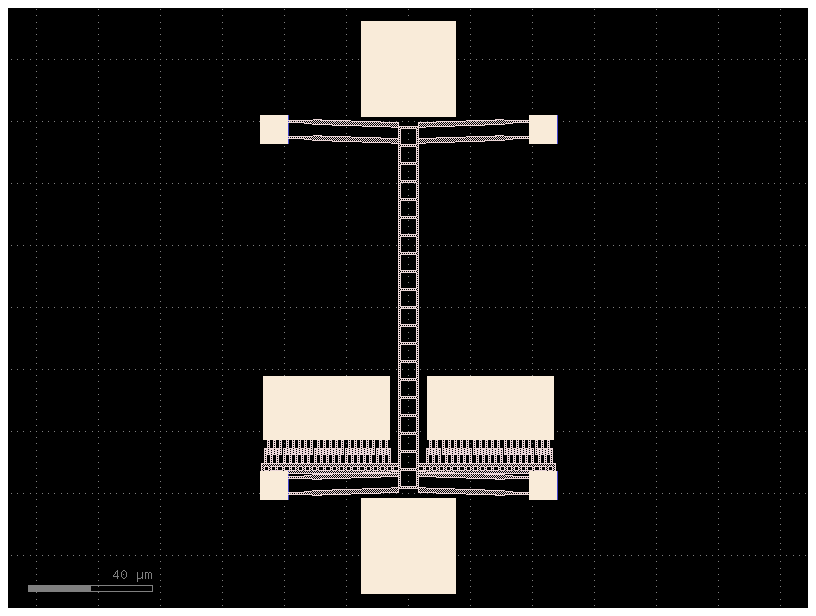

In [2]:
sw1 = make_switch_mems_bistable(
    proof_length=7, proof_height=120,
    hole_diameter=5, hole_gap=0.8,
    spring_span=40, spring_flex_ratio=0.3,
    spring_flex_width=0.8, spring_rigid_width=1.5,
    spring_initial_offset=1.2, spring_taper_length=2.0,
    spring_beam_spacing=5.0,
    spring_anchor_length=8.0, spring_anchor_width=8.0,
    finger_length=5, finger_width=0.5, finger_gap=0.5,
    finger_distance=3, num_pair=20,
    holder_width_move=3, holder_width_fixed=20,
    holder_gap_min=2, holder_top_over=0.3, holder_bottom_over=0.3,
    spring_edge_upper=1, spring_edge_lower=1,
    comb_edge_lower=5,
    pad_length_upper=30, pad_width_upper=30,
    pad_length_lower=30, pad_width_lower=30,
)
bb = sw1.dbbox()
print(f"Single-comb bistable: {bb.width():.0f} x {bb.height():.0f} um")
sw1.plot()

## Multi Comb Groups (bistable)

Three comb drive groups per side, stacked along the proof mass height.
CCS bistable springs at top and bottom with built-in multi-layer anchors.

Multi-comb bistable: 112 x 112 um


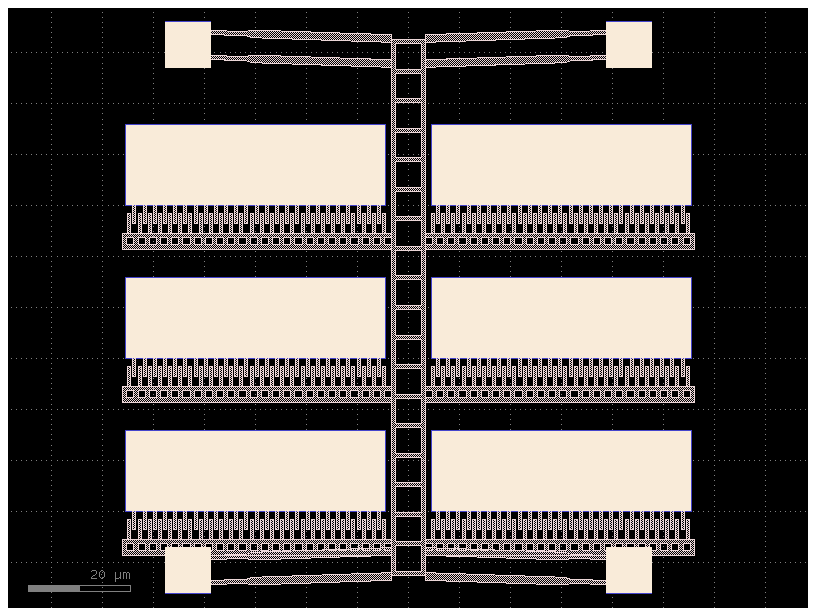

In [3]:
sw3 = make_switch_mems_multi_bistable(
    proof_length=7, proof_height=110,
    hole_diameter=5, hole_gap=0.8,
    spring_span=40, spring_flex_ratio=0.3,
    spring_flex_width=0.8, spring_rigid_width=1.5,
    spring_initial_offset=1.2, spring_taper_length=2.0,
    spring_beam_spacing=5.0,
    spring_anchor_length=8.0, spring_anchor_width=8.0,
    num_combs=3,
    finger_length=4, finger_width=0.5, finger_gap=0.5,
    finger_distance=2,
    num_pair_array=[25, 25, 25],
    edge_fixed_array=[1, 1, 1],
    holder_linewidth=0.8,
    holder_width_move_array=[3, 3, 3],
    holder_width_fixed_array=[15, 15, 15],
    holder_gap_min=2,
    holder_top_over_array=[0.3, 0.3, 0.3],
    holder_bottom_over_array=[0.5, 0.5, 0.5],
    spring_edge_upper=1, spring_edge_lower=1,
    comb_edge_lower_array=[4, 34, 64],
)
bb = sw3.dbbox()
print(f"Multi-comb bistable: {bb.width():.0f} x {bb.height():.0f} um")
sw3.plot()

## Multi Comb Groups + Corner-Cut Anchors (bistable)

Same as multi-comb but the third comb group has a corner-cut fixed anchor
(shape_code=1).

Cut-comb bistable: 112 x 112 um


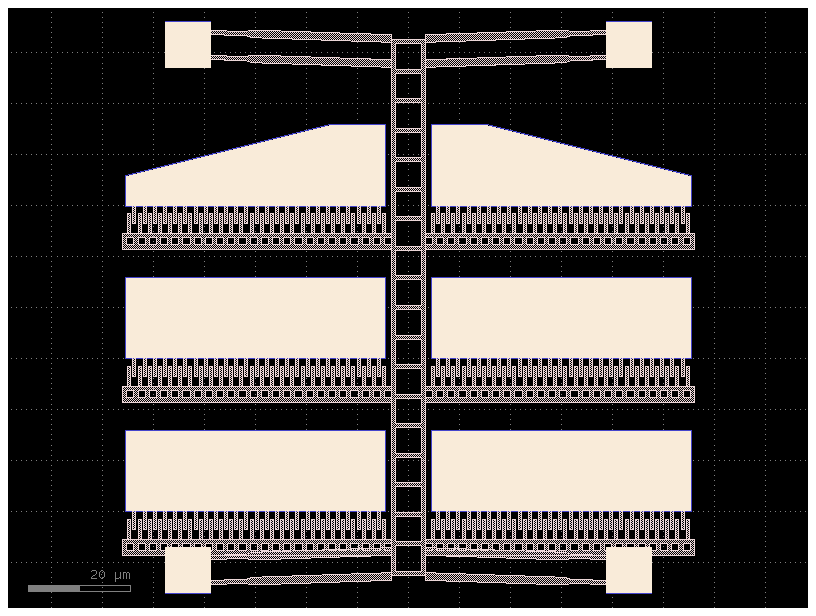

In [4]:
sw3c = make_switch_mems_cut_bistable(
    proof_length=7, proof_height=110,
    hole_diameter=5, hole_gap=0.8,
    spring_span=40, spring_flex_ratio=0.3,
    spring_flex_width=0.8, spring_rigid_width=1.5,
    spring_initial_offset=1.2, spring_taper_length=2.0,
    spring_beam_spacing=5.0,
    spring_anchor_length=8.0, spring_anchor_width=8.0,
    num_combs=3,
    finger_length=4, finger_width=0.5, finger_gap=0.5,
    finger_distance=2,
    num_pair_array=[25, 25, 25],
    edge_fixed_array=[1, 1, 1],
    holder_linewidth=0.8,
    holder_width_move_array=[3, 3, 3],
    holder_width_fixed_array=[15, 15, 15],
    holder_fixed_leftcut_array=[0, 0, 40],
    holder_fixed_topcut_array=[0, 0, 10],
    shape_code_array=[0, 0, 1],
    holder_gap_min=2,
    holder_top_over_array=[0.3, 0.3, 0.3],
    holder_bottom_over_array=[0.5, 0.5, 0.5],
    spring_edge_upper=1, spring_edge_lower=1,
    comb_edge_lower_array=[4, 34, 64],
)
bb = sw3c.dbbox()
print(f"Cut-comb bistable: {bb.width():.0f} x {bb.height():.0f} um")
sw3c.plot()

## GDS Export

In [5]:
sw3.write_gds("mems_switch_cell_bistable.gds")
print("Exported to mems_switch_cell_bistable.gds")

Exported to mems_switch_cell_bistable.gds
